In [1]:
import numpy as np
import gensim
import os
import re
from ast import literal_eval

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd
import tqdm

In [3]:
df = pd.read_csv('./data/imbd_keywords.csv')

In [4]:
df.head()

,review,sentiment,keywords
0,One of the other reviewers has mentioned that ...,positive,"['other shows', 'graphic violence', 'prison ex..."
1,A wonderful little production. The filming tec...,positive,"['halliwell', 'michael sheen', 'realism', 'com..."
2,I thought this was a wonderful way to spend ti...,positive,"['spirited young woman', 'devil wears prada', ..."
3,Basically there's a family where a little boy ...,negative,"['playing parents', 'jake', 'parents', 'descen..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"['mr. mattei', 'good luck', 'mattei', 'human r..."


In [5]:
df.shape

(40436, 3)

In [6]:
df['keywords'] = df['keywords'].apply(literal_eval)

In [7]:
df.head()

,review,sentiment,keywords
0,One of the other reviewers has mentioned that ...,positive,"[other shows, graphic violence, prison experie..."
1,A wonderful little production. The filming tec...,positive,"[halliwell, michael sheen, realism, comedy, wi..."
2,I thought this was a wonderful way to spend ti...,positive,"[spirited young woman, devil wears prada, summ..."
3,Basically there's a family where a little boy ...,negative,"[playing parents, jake, parents, descent dialo..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[mr. mattei, good luck, mattei, human relation..."


In [13]:
stop_words = [
    'movie',
    'review',
    'film', 
    'actor',
    'actress',
    'films',
]

import spacy
nlp = spacy.load('en_core_web_lg')

In [14]:
stops = nlp.Defaults.stop_words.union(stop_words)

In [11]:
df['keywords'][2]

['spirited young woman',
 'devil wears prada',
 'summer weekend',
 'match point',
 'scarlet johanson',
 'woody allen',
 'devil',
 'proof',
 'woody',
 'woodys comedies',
 'a great comedy',
 'prada',
 'superman',
 'the air conditioned theater',
 'time',
 'control',
 'friends',
 'a light-hearted comedy',
 'likable (even the well bread suspected serial killer',
 'the crown jewel',
 'a wonderful way',
 'a too hot summer weekend',
 'years',
 'the style',
 'the characters',
 'the plot',
 'her "sexy" image',
 'his career',
 'the dialogue',
 'a average',
 'i']

In [22]:
def remove_stops(_list_):
    
    keywords = []
    
    for keyword in _list_:
        
        phrase = []
        
        words = keyword.split()
        
        for word in words:
            if word in stops:
                pass
            else: 
                phrase.append(word)
            
        phrase = ' '.join(phrase)
        
        if len(phrase) > 0:
            keywords.append(phrase)
    
    return keywords
    

In [24]:
from tqdm import tqdm

tqdm.pandas()

df['clean_keywords'] = df['keywords'].progress_apply(remove_stops)

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 40436/40436 [00:01<00:00, 25757.09it/s]


In [25]:
df['clean_keywords'][765]

['orca whales',
 'nolan',
 'clear nolan',
 'total psychos',
 'total psychos',
 'poor poor whale',
 'whale',
 'killer whale',
 'whale',
 'final journey',
 'melvilles eerie man-whale connection',
 'unborn child',
 'ineffectual method',
 'compassion',
 'earth',
 'whales pain',
 'whale-character',
 'whale-hugger',
 'humans',
 'half-thought anti-human message',
 'way',
 'animals',
 'evil men',
 'revenge',
 'melville',
 'growth',
 'half',
 'hideous self-inflicted wounds',
 'message',
 'people',
 'canonical villain',
 'final scene',
 'pregnant cow',
 'unborn fetus',
 'bits',
 'message',
 'squeal',
 'sick psycho-bitch',
 'bizarre journey',
 'good snap',
 'no-doubt',
 'goal',
 'word',
 'respect',
 'mate',
 'talks',
 'grief',
 'motives',
 'focus',
 'wife',
 'cow',
 'truly interesting conclusion',
 'piece',
 'ice',
 'moment',
 'propellers',
 'fin',
 'bad thing',
 'oversight',
 'senses',
 'ends',
 'sea-monster',
 'north',
 'head',
 'victim',
 'mind',
 'water',
 'heart',
 'loss',
 'fisherman',
 'hu

In [26]:
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [56]:
# Dict representation of all our keywords
id2word = corpora.Dictionary(df['clean_keywords'])

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
id2word.token2id['sea-monster']

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


18960

In [58]:
len(id2word.keys())

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


491029

In [59]:
id2word.filter_extremes(no_below=15, no_above=0.85)

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
len(id2word.keys())

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10064

In [61]:
corpus = [id2word.doc2bow(text) for text in df['clean_keywords']]

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
corpus[812]

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(65, 1),
 (489, 1),
 (565, 1),
 (681, 1),
 (976, 1),
 (1709, 1),
 (2783, 1),
 (3686, 1),
 (3898, 1)]

In [42]:
id2word[77]

'time'

In [63]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=20,
                   passes=50, 
                   workers=12
                  )

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
lda.print_topics()

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.013*"story" + 0.010*"world" + 0.010*"characters" + 0.009*"life" + 0.009*"time" + 0.008*"people" + 0.007*"japanese" + 0.006*"art" + 0.006*"way" + 0.005*"scenes"'),
 (1,
  '0.022*"british" + 0.013*"book" + 0.011*"version" + 0.009*"dvd" + 0.009*"novel" + 0.008*"english" + 0.008*"story" + 0.007*"actors" + 0.007*"shakespeare" + 0.007*"cast"'),
 (2,
  '0.010*"movies" + 0.009*"time" + 0.008*"story" + 0.008*"plot" + 0.008*"lot" + 0.008*"way" + 0.007*"action" + 0.006*"fun" + 0.005*"today" + 0.005*"people"'),
 (3,
  '0.021*"horror" + 0.019*"gore" + 0.013*"people" + 0.012*"blood" + 0.010*"acting" + 0.010*"plot" + 0.009*"thing" + 0.007*"guy" + 0.007*"fun" + 0.006*"lot"'),
 (4,
  '0.019*"people" + 0.018*"time" + 0.010*"way" + 0.010*"money" + 0.008*"thing" + 0.007*"end" + 0.007*"life" + 0.007*"point" + 0.006*"god" + 0.006*"kind"'),
 (5,
  '0.016*"love" + 0.014*"music" + 0.013*"songs" + 0.009*"life" + 0.009*"story" + 0.007*"fun" + 0.007*"family" + 0.007*"song" + 0.006*"people" + 0.006*"role

In [65]:
import re

words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(20)]

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
topic_labels = [', '.join(t[0:5]) for t in words]

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
"story", "world", "characters", "life", "time"

------ Topic 1 ------
"british", "book", "version", "dvd", "novel"

------ Topic 2 ------
"movies", "time", "story", "plot", "lot"

------ Topic 3 ------
"horror", "gore", "people", "blood", "acting"

------ Topic 4 ------
"people", "time", "way", "money", "thing"

------ Topic 5 ------
"love", "music", "songs", "life", "story"

------ Topic 6 ------
"time", "story", "italian", "plot", "fact"

------ Topic 7 ------
"people", "episode", "series", "time", "season"

------ Topic 8 ------
"mother", "life", "women", "father", "people"

------ Topic 9 ------
"story", "time", "disney", "kids", "characters"

------ Topic 10 ------
"acting", "plot", "story", "characters", "people"

------ Topic 11 ------
"life", "end", "story", "wife", "man"

------ Topic 12 ------
"people", "war", "american", "time", "documentary"

------ Topic 13 ------
"comedy", "time", "jokes", "hollywood", "people"

------ Topic 14 ------
"french", "amer

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10    -0.129494  0.024731       1        1  8.908370
0      0.115458  0.018888       2        1  7.897700
8      0.114688 -0.133533       3        1  6.730125
3     -0.161866 -0.083415       4        1  6.563247
14     0.198378 -0.007280       5        1  6.249005
11     0.096462 -0.078705       6        1  5.444747
6      0.014620  0.048923       7        1  5.187515
4     -0.048677 -0.050720       8        1  4.974945
17    -0.101507 -0.159363       9        1  4.928511
7     -0.035202 -0.083311      10        1  4.763061
18     0.039331  0.084957      11        1  4.443922
5      0.029877 -0.007613      12        1  4.347009
9      0.007794 -0.080316      13        1  4.043455
15    -0.129449  0.076970      14        1  4.031068
12     0.046919 -0.003223      15        1  3.949939
13    -0.023318  0.113433      16        1  3.781826
2     -0.000758  0.002196      17        1  3.527670
1      0.006097  0.156037      18        1  3.500041
19    -0.074302  0.061683      19        1  3.364887
16     0.034947  0.099659      20        1  3.362958, topic_info=          Term         Freq        Total Category  logprob  loglift
81      acting  4316.000000  4316.000000  Default  30.0000  30.0000
173     horror  1378.000000  1378.000000  Default  29.0000  29.0000
1115      gore  1128.000000  1128.000000  Default  28.0000  28.0000
8      episode  1018.000000  1018.000000  Default  27.0000  27.0000
82      action  1887.000000  1887.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
120      world    89.525010  2692.624399  Topic20  -5.8154  -0.0114
426   audience    79.080669  2047.239925  Topic20  -5.9394   0.1386
94     picture    73.640302   998.068904  Topic20  -6.0107   0.7857
9         fact    77.971861  4419.465811  Topic20  -5.9536  -0.6451
61        plot    77.004040  5065.963376  Topic20  -5.9661  -0.7941

[1671 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
9802      1  0.945089  "actors
5134     13  0.029365     13th
5134     19  0.939673     13th
6878     16  0.938770      20s
8206     11  0.961586      50%
...     ...       ...      ...
2886      9  0.003694  zombies
2886     10  0.007389  zombies
2886     15  0.033249  zombies
7973     17  0.913022    zorro
7973     19  0.043477    zorro

[6552 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 1, 9, 4, 15, 12, 7, 5, 18, 8, 19, 6, 10, 16, 13, 14, 3, 2, 20, 17])

In [71]:
distro = [lda[doc] for doc in corpus]

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
distro[0]

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(4, 0.1116744), (7, 0.21494706), (8, 0.3555938), (14, 0.29553196)]

In [74]:
def update(doc):
    d_dist = {k:0 for k in range(0,20)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro] 

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
topics = pd.DataFrame.from_records(new_distro)
topics.columns = topic_labels

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
topics.head()

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"""story"", ""world"", ""characters"", ""life"", ""time""","""british"", ""book"", ""version"", ""dvd"", ""novel""","""movies"", ""time"", ""story"", ""plot"", ""lot""","""horror"", ""gore"", ""people"", ""blood"", ""acting""","""people"", ""time"", ""way"", ""money"", ""thing""","""love"", ""music"", ""songs"", ""life"", ""story""","""time"", ""story"", ""italian"", ""plot"", ""fact""","""people"", ""episode"", ""series"", ""time"", ""season""","""mother"", ""life"", ""women"", ""father"", ""people""","""story"", ""time"", ""disney"", ""kids"", ""characters""","""acting"", ""plot"", ""story"", ""characters"", ""people""","""life"", ""end"", ""story"", ""wife"", ""man""","""people"", ""war"", ""american"", ""time"", ""documentary""","""comedy"", ""time"", ""jokes"", ""hollywood"", ""people""","""french"", ""american"", ""german"", ""english"", ""story""","""action"", ""plot"", ""actors"", ""bad guys"", ""fact""","""half"", ""time"", ""role"", ""second"", ""batman""","""time"", ""people"", ""thing"", ""way"", ""head""","""time"", ""movies"", ""people"", ""characters"", ""life""","""time"", ""christmas"", ""actors"", ""story"", ""script"""
0,0.000000,0.000000,0.0,0.000000,0.111674,0.000000,0.000000,0.214947,0.355594,0.0,0.000000,0.000000,0.0,0.000000,0.295532,0.000000,0.00000,0.0,0.0,0.000000
1,0.625039,0.327568,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.194493,0.000000,0.0,0.157656,0.000000,0.000000,0.20712,0.0,0.0,0.393654
3,0.000000,0.000000,0.0,0.176343,0.000000,0.448771,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.309476,0.00000,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.251384,0.000000,0.215962,0.0,0.207065,0.202028,0.0,0.000000,0.000000,0.098538,0.00000,0.0,0.0,0.000000


In [83]:
df['primary_topic'] = topics.idxmax(axis=1)

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
df.head()

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,sentiment,keywords,clean_keywords,primary_topic
0,One of the other reviewers has mentioned that ...,positive,"[other shows, graphic violence, prison experie...","[shows, graphic violence, prison experience, p...","""mother"", ""life"", ""women"", ""father"", ""people"""
1,A wonderful little production. The filming tec...,positive,"[halliwell, michael sheen, realism, comedy, wi...","[halliwell, michael sheen, realism, comedy, wi...","""story"", ""world"", ""characters"", ""life"", ""time"""
2,I thought this was a wonderful way to spend ti...,positive,"[spirited young woman, devil wears prada, summ...","[spirited young woman, devil wears prada, summ...","""time"", ""christmas"", ""actors"", ""story"", ""script"""
3,Basically there's a family where a little boy ...,negative,"[playing parents, jake, parents, descent dialo...","[playing parents, jake, parents, descent dialo...","""love"", ""music"", ""songs"", ""life"", ""story"""
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[mr. mattei, good luck, mattei, human relation...","[mr. mattei, good luck, mattei, human relation...","""time"", ""story"", ""italian"", ""plot"", ""fact"""


In [86]:
df['primary_topic'].value_counts()

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"acting", "plot", "story", "characters", "people"     5056
"horror", "gore", "people", "blood", "acting"         3023
"story", "world", "characters", "life", "time"        3005
"mother", "life", "women", "father", "people"         2442
"french", "american", "german", "english", "story"    2116
"people", "time", "way", "money", "thing"             2109
"people", "episode", "series", "time", "season"       2027
"time", "people", "thing", "way", "head"              1999
"time", "movies", "people", "characters", "life"      1949
"time", "story", "italian", "plot", "fact"            1821
"love", "music", "songs", "life", "story"             1816
"life", "end", "story", "wife", "man"                 1810
"story", "time", "disney", "kids", "characters"       1735
"action", "plot", "actors", "bad guys", "fact"        1647
"comedy", "time", "jokes", "hollywood", "people"      1517
"time", "christmas", "actors", "story", "script"      1402
"movies", "time", "story", "plot", "lot"              13

In [96]:
agg = pd.pivot_table(df, values=['review'], 
                     index=['primary_topic'], 
                     columns=['sentiment'], aggfunc='count')

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
agg = agg.reset_index()

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


primary_topic   review         
sentiment                                                    negative positive
0          "acting", "plot", "story", "characters", "people"     3808     1248
1             "action", "plot", "actors", "bad guys", "fact"     1017      630
2               "british", "book", "version", "dvd", "novel"      547      692
3           "comedy", "time", "jokes", "hollywood", "people"      612      905
4          "french", "american", "german", "english", "st...      724     1392
5                 "half", "time", "role", "second", "batman"      458      651
6              "horror", "gore", "people", "blood", "acting"     2179      844
7                      "life", "end", "story", "wife", "man"      681     1129
8                  "love", "music", "songs", "life", "story"      524     1292
9              "mother", "life", "women", "father", "people"     1050     1392
10                  "movies", "time", "story", "plot", "lot"      385      930
11           "people", "episode", "series", "time", "season"     1027     1000
12                 "people", "time", "way", "money", "thing"     1475      634
13         "people", "war", "american", "time", "document...      589      710
14           "story", "time", "disney", "kids", "characters"      674     1061
15            "story", "world", "characters", "life", "time"      974     2031
16          "time", "christmas", "actors", "story", "script"      714      688
17          "time", "movies", "people", "characters", "life"      531     1418
18                  "time", "people", "thing", "way", "head"     1316      683
19                "time", "story", "italian", "plot", "fact"      929      892

In [102]:
agg.columns = ['primary_topic', 'negative', 'positive']
agg.head()

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,primary_topic,negative,positive
0,"""acting"", ""plot"", ""story"", ""characters"", ""people""",3808,1248
1,"""action"", ""plot"", ""actors"", ""bad guys"", ""fact""",1017,630
2,"""british"", ""book"", ""version"", ""dvd"", ""novel""",547,692
3,"""comedy"", ""time"", ""jokes"", ""hollywood"", ""people""",612,905
4,"""french"", ""american"", ""german"", ""english"", ""st...",724,1392


/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


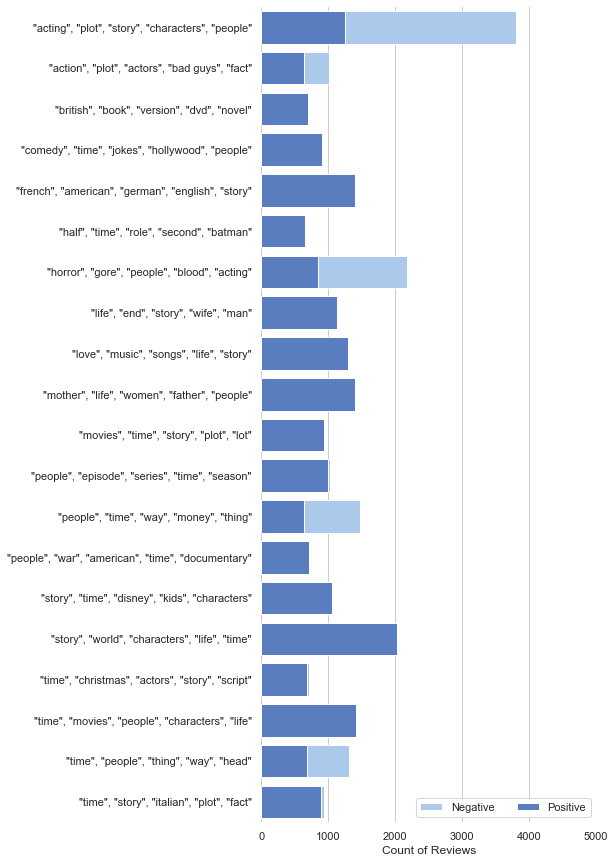

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes('pastel')
sns.barplot(x='negative', y='primary_topic', data=agg, label="Negative", color="b")

sns.set_color_codes('muted')
sns.barplot(x='positive', y='primary_topic', data=agg, label="Positive", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,5000), ylabel="", xlabel="Count of Reviews")
sns.despine(left=True, bottom=True)